# **Starter**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/VoiceSpoof/ASVspoof2021_LA_eval/Features/4sec/Raw"

Raw_eval.npy  Raw_hidden.npy  Raw_progress.npy	Raw_thai_eval.npy


In [ ]:
import pandas as pd

asv_df = pd.read_csv("/content/drive/MyDrive/VoiceSpoof/ASVspoof2021_LA_eval/Dataset/asv_key.csv")
thai_df = pd.read_csv("/content/drive/MyDrive/VoiceSpoof/ASVspoof2021_LA_eval/Dataset/thai_key.csv")

asv_df["labels"] = asv_df["labels"].replace({'spoof': 0, 'bonafide': 1}) # 0 ปลอม, 1 จริง
asv_df['file_path'] = asv_df['file_path'].str.replace('Voice Spoof', 'VoiceSpoof')
thai_df['file_path'] = thai_df['file_path'].str.replace('Voice Spoof', 'VoiceSpoof')

In [ ]:
thai_df.head()

,file_path,file_name,type,labels,set
0,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...,1common_voice_th_23654878_pitch_shift_0.8.wav,down20,0,eval
1,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...,1common_voice_th_23655067_pitch_shift_0.8.wav,down20,0,eval
2,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...,1common_voice_th_23646687_pitch_shift_0.8.wav,down20,0,eval
3,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...,1common_voice_th_23654397_pitch_shift_0.8.wav,down20,0,eval
4,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...,1common_voice_th_23654690_pitch_shift_0.8.wav,down20,0,eval


In [ ]:
asv_df.head()

,file_name,0,2,3,4,labels,6,7,file_path
0,LA_E_6869886.flac,LA_0013,alaw,ita_tx,A07,0,notrim,eval,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...
1,LA_E_9900388.flac,LA_0039,opus,loc_tx,bonafide,1,notrim,eval,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...
2,LA_E_7308092.flac,LA_0047,none,-,A12,0,notrim,progress,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...
3,LA_E_3024754.flac,LA_0043,gsm,sin_tx,A14,0,notrim,eval,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...
4,LA_E_3611176.flac,LA_0006,opus,sin_tx,A16,0,notrim,eval,/content/drive/MyDrive/VoiceSpoof/ASVspoof2021...


In [ ]:
# split

eval = asv_df[asv_df["7"] == 'eval'] # test
hidden = asv_df[asv_df["7"] == 'hidden'] # eval
progress = asv_df[asv_df["7"] == 'progress'] # train

thai_eval = thai_df[thai_df["set"] == "eval"] #thai train
thai_train = thai_df[thai_df["set"] == "train"] #thau eval

In [ ]:
# import librosa
# import IPython.display as ipd

# flac_file_path = asv_df['file_path'][544]

# def listen_audio(audio, sr=16000):
#     display(ipd.Audio(audio, rate=sr))

# listen_audio(flac_file_path)


In [ ]:
# import librosa
# import matplotlib.pyplot as plt

# flac_file_path = asv_df['file_path'][544]
# def plot_audio(audio, sr=16000):
#     fig = librosa.display.waveshow(audio,
#                              x_axis='time',
#                              sr=sr)
#     return fig

# def load_audio(path, sr=16000):

#     audio, sr = librosa.load(path, sr=sr)
#     return audio, sr

# audio, sr= load_audio(flac_file_path, sr=None)
# plot_audio(audio)


In [ ]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

# Assuming asv_df is your DataFrame with a column named 'file_path'
# Load your DataFrame
# asv_df = pd.read_csv("your_dataframe.csv")
# progress = progress[:100]
# Compute duration for each audio file
thai_df['duration'] = thai_df['file_path'].apply(lambda x: librosa.get_duration(filename=x))


In [ ]:
!ls "/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Dataset/thai_time.csv"

'/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Dataset/thai_time.csv'


In [ ]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

thai_df = pd.read_csv("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Dataset/thai_time.csv")

In [ ]:
thai_df.head()

,file_path,file_name,type,labels,set,duration
0,/content/drive/MyDrive/Voice Spoof/ASVspoof202...,1common_voice_th_23654878_pitch_shift_0.8.wav,down20,0,eval,4.147208
1,/content/drive/MyDrive/Voice Spoof/ASVspoof202...,1common_voice_th_23655067_pitch_shift_0.8.wav,down20,0,eval,2.419208
2,/content/drive/MyDrive/Voice Spoof/ASVspoof202...,1common_voice_th_23646687_pitch_shift_0.8.wav,down20,0,eval,1.785604
3,/content/drive/MyDrive/Voice Spoof/ASVspoof202...,1common_voice_th_23654397_pitch_shift_0.8.wav,down20,0,eval,3.014417
4,/content/drive/MyDrive/Voice Spoof/ASVspoof202...,1common_voice_th_23654690_pitch_shift_0.8.wav,down20,0,eval,2.611208


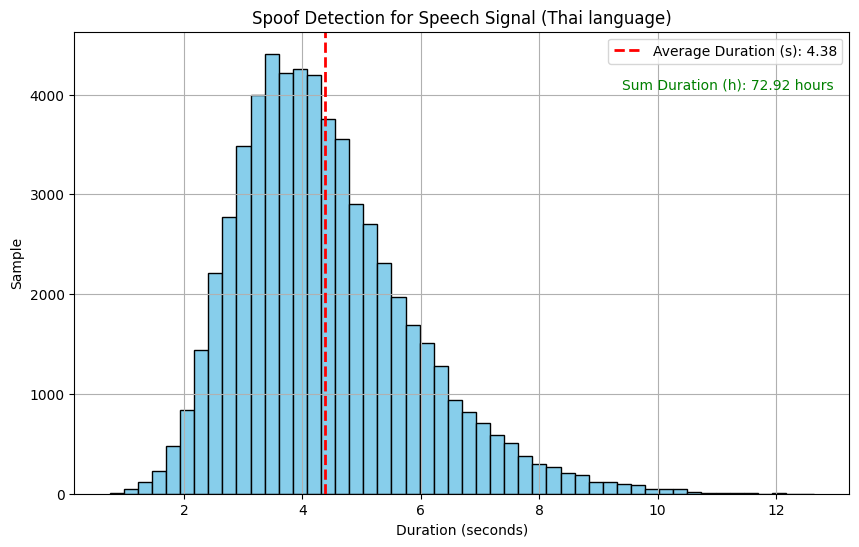

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot duration
plt.figure(figsize=(10, 6))
plt.hist(thai_df['duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Spoof Detection for Speech Signal (Thai language)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Sample')
plt.grid(True)

# Calculate and plot average duration
average_duration_seconds = thai_df['duration'].mean()
hours = thai_df['duration'].sum() / 3600
plt.axvline(average_duration_seconds, color='red', linestyle='dashed', linewidth=2, label=f'Average Duration (s): {average_duration_seconds:.2f}')

# Add text annotation for sum duration
plt.text(0.98, 0.9, f'Sum Duration (h): {hours:.2f} hours', color='green', fontsize=10, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.legend()

plt.show()

In [ ]:
thai_df.to_csv("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Dataset/thai_time.csv", index = False)

In [ ]:
# Define weights for Thai and English
weight_thai = 47891
weight_english = 45952

# Define scores for Thai and English
score_thai = 36.20872
score_english = 6.61115

# Calculate the weighted average
weighted_average = (weight_thai * score_thai + weight_english * score_english) / (weight_thai + weight_english)

print("Weighted Average:", weighted_average)


Weighted Average: 21.715710008418316


In [ ]:
# Define weights for Thai and English
weight_thai = 47891
weight_english = 45952

# Define scores for Thai and English
score_english_1 = 15.48388
score_english_2 =  0.48154

# Define scores for the second pair
score_thai_1 = 13.04430
score_thai_2 = 0.40881

# Calculate the weighted average for the first pair
weighted_average_1 = (weight_thai * score_thai_1 + weight_english * score_english_1) / (weight_thai + weight_english)

# Calculate the weighted average for the second pair
weighted_average_2 = (weight_thai * score_thai_2 + weight_english * score_english_2) / (weight_thai + weight_english)

# Calculate the overall weighted average
overall_weighted_average = (weighted_average_1 + weighted_average_2) / 2

print("Weighted Average for the first pair:", weighted_average_1)
print("Weighted Average for the second pair:", weighted_average_2)


Weighted Average for the first pair: 14.238886491906694
Weighted Average for the second pair: 0.44442362019543286


In [ ]:
6.61115 / 0.26426	36.20872 / 0.94955 21.715710008418316/0.6139847891691442
53.85428 / 0.99989	16.01126 / 0.51032  34.54181054761676/0.7500472107669192
11.75099 / 0.38505	19.33343 / 0.57368 15.620544831367285/0.4813137525441428
5.53438 / 0.21837	41.15709 / 0.98984  23.71375624127532/0.6120751220655777
50.29620 / 0.99998	18.27725 /  0.55222 33.95593450923351/ 0.7714741534264676
11.17923 / 0.37851	19.50033 / 0.57978  15.425745990537388/0.4812243374572424
11.3859 / 0.3178	49.7216 / 0.9828 30.949799371290347/0.6571701714565817
61.8711 / 0.9999	2.1337 / 0.1272 31.38524784906706/0.5545340622102874
11.3115 / 0.30461	2.7987 / 0.1472 6.967153540487836/0.22427878392634507
12.05812 / 0.40664	34.97751 / 0.99350 23.7545971638801/0.7061329004827211
50.38482 / 0.99995	10.16677 / 0.34072 29.860298911053565/ 0.6635244389032747
12.54127 / 0.41375	10.61141 / 0.35411 11.556402452500452/0.3833138540967361
15.15490 / 0.46836	38.65616 / 0.95594 27.14832351224917/0.7171872303741356
44.38431 / 0.99925	12.69980 / 0.40044 28.214719637266498/0.6936586430527584
15.48388 /  0.48154	13.04430 / 0.40881 14.238886491906694/0.44442362019543286


In [ ]:
asv_df["7"].value_counts()

eval        45952
hidden       5244
progress     5055
Name: 7, dtype: int64

In [ ]:
progress["labels"].value_counts()

0    4539
1     516
Name: labels, dtype: int64

In [ ]:
hidden["labels"].value_counts()

0    4647
1     597
Name: labels, dtype: int64

In [ ]:
thai_train["labels"].value_counts()

0    11000
1     1000
Name: labels, dtype: int64

In [ ]:
eval["labels"].value_counts()

0    41399
1     4553
Name: labels, dtype: int64

In [ ]:
thai_eval["labels"].value_counts()

0    38891
1     9000
Name: labels, dtype: int64

In [ ]:
len(thai_eval)

47891

# **Raw**

In [ ]:
import pandas as pd
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor

count = 0  # Initialize count variable

def extract_raw(audio_path, target_length=4.0):
    global count
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=48000)

        # Ensure the audio has the target duration
        target_samples = int(target_length * sr)
        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        count += 1
        print(count)

        return y
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None

def extract_raw_parallel(row):
    return extract_raw(row.file_path)

In [ ]:
# import soundfile as sf

# # Replace thai_train.file_path[8] with the actual file path
# file_path = thai_train.file_path[14]

# # Open the audio file and get the sample rate
# with sf.SoundFile(file_path) as audio_file:
#     sr = audio_file.samplerate
#     print(f"Sample rate (sr) of {file_path}: {sr} Hz")


In [ ]:
from concurrent.futures import ThreadPoolExecutor

df_toloaded = thai_train
with ThreadPoolExecutor() as executor:
    # Apply extract_spectrogram_parallel to each row in the DataFrame
    results = list(executor.map(extract_raw_parallel,df_toloaded.itertuples(index=False)))

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
70857086

7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
718

In [ ]:
# Filter out any None results (error cases)
raw = [result for result in results if result is not None]

raws = np.array(raw)

In [ ]:
raws[4][:2007]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
!ls '/content/drive/MyDrive/VoiceSpoof/ASVspoof2021_LA_eval/Features/4sec/Raw/'

Raw_eval.npy  Raw_hidden.npy  Raw_progress.npy	Raw_thai_eval.npy  Raw_thai_train.npy


In [ ]:
# Save concatenated numpy arrays to a single .npy file
np.save("/content/drive/MyDrive/VoiceSpoof/ASVspoof2021_LA_eval/Features/4sec/Raw/Raw_thai_train.npy", raws)

# **Mel spectrogram**

In [ ]:
import pandas as pd
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor

count = 0  # Initialize count variable

def extract_spectrogram(audio_path, target_length=4.0):
    global count
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=16000)

        # Ensure the audio has the target duration
        target_samples = int(target_length * sr)
        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        # Compute the spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

        count += 1
        print(count)

        # Convert to decibels (log scale)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        return spectrogram
    except Exception as e:
        print(f"Error processing file {audio_path}: {e}")
        return None

def extract_spectrogram_parallel(row):
    return extract_spectrogram(row.file_path)

In [ ]:
from concurrent.futures import ThreadPoolExecutor

df_toload = thai_eval
with ThreadPoolExecutor() as executor:
    # Apply extract_spectrogram_parallel to each row in the DataFrame
    results = list(executor.map(extract_spectrogram_parallel, df_toload.itertuples(index=False)))

# Filter out any None results (error cases)
spectrograms = [result for result in results if result is not None]

result_spectrograms = np.array(spectrograms)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42936
42937
42938
42939
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
4296342964

42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
4300743008

43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
4302243023

43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
4303643037

43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
4

In [ ]:
result_spectrograms.shape

(47891, 128, 126)

In [ ]:
np.save("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/Melspectrogram/Melspectrogram_thai_eval.npy", result_spectrograms)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

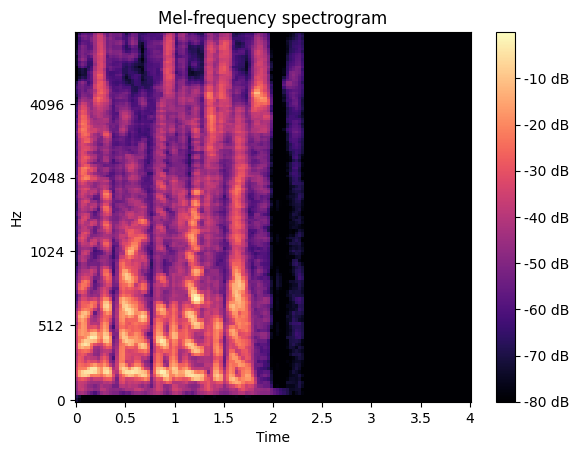

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# S_dB = librosa.power_to_db(result_spectrograms[0], ref=np.max)
img = librosa.display.specshow(result_spectrograms[0], x_axis='time',
                         y_axis='mel', sr=16000,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
spectrogram_progress[0]

array([[-71.01737 , -76.865814, -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-67.01366 , -72.54088 , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-49.945976, -43.440666, -42.353558, ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-78.37254 , -63.262352, -55.313225, ..., -80.      , -80.      ,
        -80.      ],
       [-77.83497 , -59.067028, -52.53267 , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -66.11825 , -57.494003, ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
spectrogram_progress = np.load("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/Melspectrogram/Melspectrogram_progress.npy")
# X_test = np.load("/content/drive/MyDrive/Voice Spoof/Spec/spectrogram_features_eval.npy")
# X_val = np.load("/content/drive/MyDrive/Voice Spoof/Spec/spectrogram_features_hidden.npy")

In [ ]:
spectrogram_progress.shape

(5055, 128, 126)

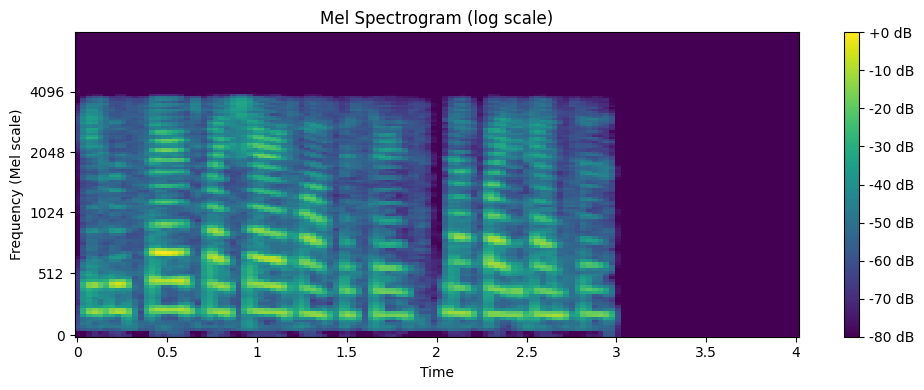

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Plot Mel spectrogram as heatmap
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_progress[7], sr=16000, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (log scale)')
plt.xlabel('Time')
plt.ylabel('Frequency (Mel scale)')
plt.tight_layout()
plt.show()


# **LFCC**

In [ ]:
pip install spafe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 2.4 MB/s eta 0:00:00


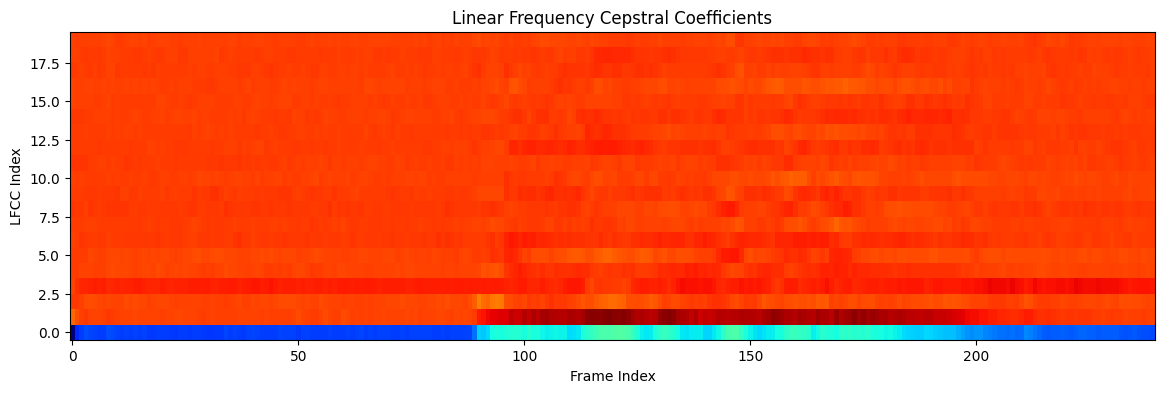

In [ ]:
from spafe.features import lfcc, bfcc, cqcc, mfcc, msrcc, ngcc, pncc, psrcc, rplp
from spafe.utils.preprocessing import SlidingWindow
import soundfile as sf
import numpy as np
from spafe.utils.vis import show_features
from spafe.utils.vis import show_spectrogram

path_test = thai_df["file_path"][1]
audio, rate = sf.read(path_test)
length = len(audio)

# Configuration
w_len = 0.02
n_fft = 2048
num_features = 20

# Path to the speech file

feature = lfcc.lfcc(audio, fs=rate,
                    pre_emph=1, num_ceps=num_features,
                    pre_emph_coeff=0.97, window=SlidingWindow(w_len, w_len/2, "hamming"),
                    nfilts=128, nfft=n_fft, low_freq=0, high_freq=rate/2)

show_features(feature, "Linear Frequency Cepstral Coefﬁcients", "LFCC Index", "Frame Index")

In [ ]:
import librosa
import numpy as np
from spafe.features import lfcc

count = 0  # Initialize global variable count

def extract_lfcc_features(file_path, target_length=4.0):
    global count

    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=16000, duration=target_length)
        # Ensure audio length is exactly 4 seconds
        target_samples = int(target_length * sr)

        if len(y) < target_samples:
            # Pad with zeros if shorter than 5 seconds
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            # Truncate if longer than 4 seconds
            y = y[:target_samples]

        lfcc_feature = lfcc.lfcc(y, fs=sr,
                    pre_emph=1, num_ceps=num_features,
                    pre_emph_coeff=0.97,
                    nfilts=128, nfft=n_fft, low_freq=0, high_freq=sr/2)

        print(count)
        count += 1

        return lfcc_feature
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def extract_lfcc_parallel(row):
    return extract_lfcc_features(row.file_path)

In [ ]:
# Process data sequentially
df_toload = thai_eval
results = []
for row in df_toload.itertuples(index=False):
    result = extract_lfcc_parallel(row)
    results.append(result)

# Filter out any None results (error cases)
lfcc = [result for result in results if result is not None]

lfccs = np.array(lfcc)

Streaming output truncated to the last 5000 lines.
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
2

In [ ]:
lfccs.shape

In [ ]:
np.save("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/LFCC/lfcc_thai_eval.npy", lfccs)

# **VGGish**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import librosa
import pandas as pd

# Load the VGGish model from TensorFlow Hub.
vggish_url = "https://tfhub.dev/google/vggish/1"
vggish_model = hub.load(vggish_url)
count = 0

def vgg_feature(audio_path, target_length=4.0, target_sr=16000, vggish_model=vggish_model):
    global count
    try:
        # Load audio file with librosa
        y, sr = librosa.load(audio_path, sr=None)

        # Ensure the audio has the target duration
        target_samples = int(target_length * target_sr)

        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        # Run the VGGish model to generate embeddings
        embeddings = vggish_model(y)
        # Convert TensorFlow tensors to numpy arrays
        embeddings = np.array(embeddings)
        count += 1
        print(count)
        # print(embeddings)
        return embeddings
    except Exception as e:
        print(f"Error processing audio file: {audio_path}")
        print(e)
        return None

def extract_vgg_parallel(row):
    return vgg_feature(row.file_path)


In [ ]:
# Process data sequentially
df_toload = eval
results = []
for row in df_toload.itertuples(index=False):
    result = extract_vgg_parallel(row)
    results.append(result)

# Filter out any None results (error cases)
vgg = [result for result in results if result is not None]

vggs = np.array(vgg)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
4

In [ ]:
vggs.shape

(45952, 4, 128)

In [ ]:
np.save("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/VGG/VGG_eval.npy", vggs)

In [ ]:
import numpy as np

progress_vgg = np.load("/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/VGGish/VGGish_features_progress.npy")

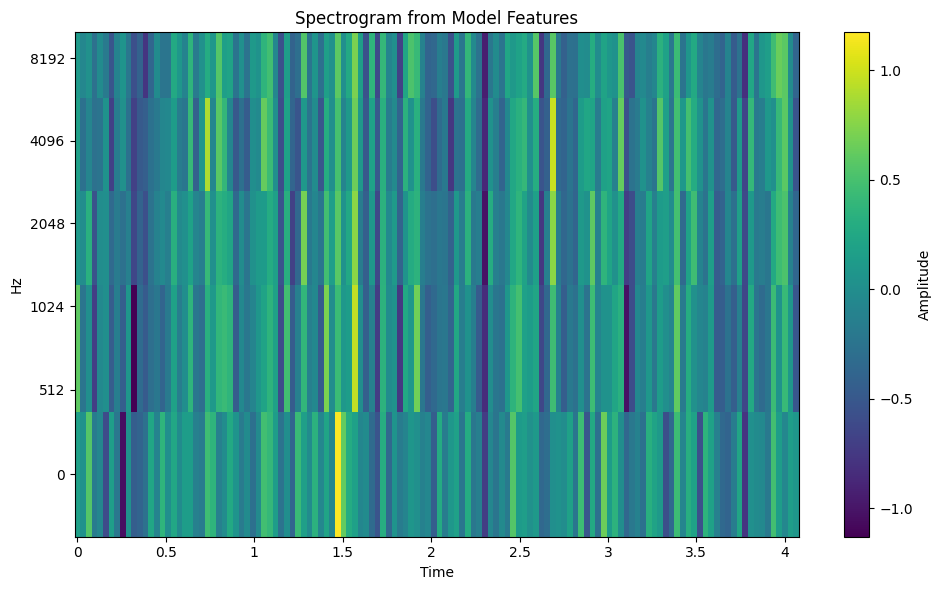

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import librosa
import librosa.display

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.title('Spectrogram from Model Features')
plt.xlabel('Time')
plt.ylabel('Frequency')
librosa.display.specshow(progress_vgg[1], sr=16000, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

# Plot Mel spectrogram as heatmap
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(spectrogram_progress[7], sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel Spectrogram (log scale)')
# plt.xlabel('Time')
# plt.ylabel('Frequency (Mel scale)')
# plt.tight_layout()
# plt.show()


# **wav2vec2**

In [ ]:
 from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
 import torch

 # load model and tokenizer
 processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [ ]:
import librosa
flac_file_path = progress['file_path'][2]

def load_audio(path, sr=16000):

    y, sr = librosa.load(path, sr=sr)
    target_samples = 64000

    # if len(y) < target_samples:
    #     y = np.pad(y, (0, target_samples - len(y)), 'constant')
    # elif len(y) > target_samples:
    #     y = y[:target_samples]

    return y, sr

audio, sr= load_audio(flac_file_path, sr=None)

input = processor(audio, sampling_rate=sr, return_tensors="pt", padding=True)

In [ ]:
input

{'input_values': tensor([[-0.0038, -0.0029, -0.0018,  ..., -0.0186, -0.0054,  0.0186]])}

In [ ]:
audio[:10]

array([-0.00064087, -0.00048828, -0.00030518, -0.00036621, -0.00061035,
       -0.0010376 , -0.00170898, -0.00164795, -0.00149536, -0.00131226],
      dtype=float32)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import librosa
import pandas as pd

count = 0

def wav_feature(audio_path, target_length=4.0, target_sr=16000):
    global count
    try:
        # Load audio file with librosa
        y, sr = librosa.load(audio_path, sr=target_sr)

        # Ensure the audio has the target duration
        target_samples = int(target_length * target_sr)
        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        # Run the VGGish model to generate embeddings
        input = processor(y, sampling_rate=sr, return_tensors="pt")
        # Convert TensorFlow tensors to numpy arrays

        count += 1
        print(count)

        return input
    except Exception as e:
        print(f"Error processing audio file: {audio_path}")
        print(e)
        return None

def extract_wav_parallel(row):
    return wav_feature(row.file_path)


In [ ]:
df_toloaded = thai_eval

from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor() as executor:
    # Apply extract_spectrogram_parallel to each row in the DataFrame
    results = list(executor.map(extract_wav_parallel,df_toloaded.itertuples(index=False)))

# Extract values from tensors and concatenate them into a single numpy array
input_values = np.concatenate([item['input_values'].numpy() for item in results], axis=0)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42936
42937
42938
42939
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
4302643027

43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
4

In [ ]:
input_values.shape

(47891, 64000)

In [ ]:
# Save the arrays to an NPY file
np.save('/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/Wav2vec/Wav2vec_thai_eval.npy', input_values)

In [ ]:
!ls "/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/Wav2vec"

Wav2vec_eval.npy  Wav2vec_hidden.npy  Wav2vec_progress.npy  Wav2vec_thai_train.npy


In [ ]:
data = np.load('/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/Wav2vec/Wav2vec_progress.npy')
# input_values2 = data.['input_values']
# attention_mask2 = data['attention_mask']

# **AST**

In [ ]:
from transformers import AutoProcessor, ASTModel
import librosa
import torch

flac_file_path = progress['file_path'][2]
audio, sr = librosa.load(flac_file_path, sr=None)

processor = AutoProcessor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
input = processor(audio, sampling_rate=sr, return_tensors="pt")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
input.input_values

tensor([[[-0.9030, -0.9960, -0.6192,  ..., -0.8058, -0.8545, -0.8687],
         [-0.8022, -0.9908, -0.6140,  ..., -0.1488, -0.2213, -0.3248],
         [-0.3864, -0.7214, -0.3446,  ..., -0.1307, -0.1938, -0.2454],
         ...,
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]]])

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import librosa
import pandas as pd

count = 0

import numpy as np
import librosa

# Assuming `processor` is defined elsewhere in your code
def ast_feature(audio_path, target_length=4.0, target_sr=16000):
    global count
    try:
        # Load audio file with librosa
        y, sr = librosa.load(audio_path, sr=target_sr)

        # Ensure the audio has the target duration
        target_samples = int(target_length * target_sr)
        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        input_values = []

        # Assuming processor returns a dictionary with keys 'input_values' and 'attention_mask'
        input = processor(y, sampling_rate=sr, return_tensors="pt")

        count += 1
        print(count)

        # stacked_input_values = torch.stack(input_values)

        return input
    except Exception as e:
        print(f"Error processing audio file: {audio_path}")
        print(e)
        return None


def extract_ast_parallel(row):
    return ast_feature(row.file_path)


In [ ]:
from concurrent.futures import ThreadPoolExecutor

df_toloaded = thai_eval[len(thai_eval)//2:]
with ThreadPoolExecutor() as executor:
    # Apply extract_spectrogram_parallel to each row in the DataFrame
    results = list(executor.map(extract_ast_parallel,df_toloaded.itertuples(index=False)))

In [ ]:
len(results)

23946

In [ ]:
# Extract values from tensors and concatenate them into a single numpy array
input_values = np.concatenate([item['input_values'].numpy() for item in results], axis=0)
# attention_mask = np.concatenate([item['attention_mask'].numpy() for item in results], axis=0)

# Save concatenated numpy arrays to a single .npy file
np.savez('/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/AST/ast_thai_eval2.npz', input_values = input_values)

In [ ]:
input_values.shape # (23945, 1024, 128)

(23946, 1024, 128)

In [ ]:
data = np.load('/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/ast/ast_features_hidden.npy', allow_pickle=True)
input_values2 = data.item()['input_values']

In [ ]:
input_values2.shape

(5244, 1024, 128)

# **CED**

In [ ]:
pip install git+https://github.com/speechbrain/speechbrain.git@develop


  Cloning https://github.com/speechbrain/speechbrain.git (to revision develop) to /tmp/pip-req-build-faano4p4
  Running command git clone --filter=blob:none --quiet https://github.com/speechbrain/speechbrain.git /tmp/pip-req-build-faano4p4
  Resolved https://github.com/speechbrain/speechbrain.git to commit 75049f4301256b9f2f960b53a9bf217b1fd35485
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import librosa
import torch
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier
import torchvision

flac_file_path = progress['file_path'][26]
audio, sr = librosa.load(flac_file_path, sr=None)

classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")


<ipython-input-7-716cab7e0d9e>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(flac_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
import numpy as np
import librosa
import torch

count = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def spkrec_feature(audio_path, target_length=4.0, target_sr=16000, spkrecish_model=classifier):
    global count
    try:
        # Load audio file with librosa
        y, sr = librosa.load(audio_path, sr=target_sr)

        # Ensure the audio has the target duration
        target_samples = int(target_length * target_sr)

        if len(y) < target_samples:
            y = np.pad(y, (0, target_samples - len(y)), 'constant')
        elif len(y) > target_samples:
            y = y[:target_samples]

        audio_tensor = torch.tensor(y)
        audio_tensor = audio_tensor.to(device)
        # Run the spkrecish model to generate embeddings

        embeddings = spkrecish_model.encode_batch(audio_tensor)
        embeddings = embeddings.squeeze().numpy()

        count += 1
        print(count)

        return embeddings
    except Exception as e:
        print(f"Error processing audio file: {audio_path}")
        print(e)
        return None

def extract_spkrec_parallel(row):
    return spkrec_feature(row.file_path)


In [ ]:
# Process data sequentially
df_toload = thai_train
results = []
for row in df_toload.itertuples(index=False):
    result = extract_spkrec_parallel(row)
    results.append(result)

# Filter out any None results (error cases)
spkrec = [result for result in results if result is not None]

spkrecs = np.array(spkrec)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
718

In [ ]:
spkrecs.shape

(12000, 192)

In [ ]:
# Save the arrays to an NPY file
np.save('/content/drive/MyDrive/Voice Spoof/ASVspoof2021_LA_eval/Features/4sec/spkrec/spkrec_thai_train.npy', spkrecs)